In [ ]:
from __future__ import division
%pylab inline

In [3]:
from input_data import *
import csv

repins_map = {}

total_repins = 0
total_users = None
with open(INPUT_REPINS, 'rb') as repins_file:
    reader = csv.reader(repins_file, delimiter='|')
    
    for row in reader:
        total_repins += 1
        
        user_id = int(row[0])
        pin_id = int(row[1])
        
        if user_id in repins_map:
            repins_map[user_id] += 1
        else:
            repins_map[user_id] = 1

total_users = len(repins_map)

items = repins_map.items()
min_no_of_repins = min(items, key=lambda x: x[1])[1]
max_no_of_repins = max(items, key=lambda x: x[1])[1]

print 'Minimum number of repins', min_no_of_repins
print 'Maximum number of repins', max_no_of_repins
print 'Average number of repins per user', total_repins / total_users

Minimum number of repins 1
Maximum number of repins 95
Average number of repins per user 6.27840444384


No of intervals: 21
Interval size: 4.47619047619


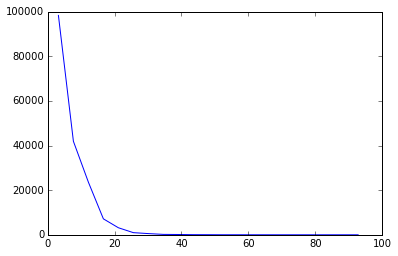

In [15]:
import matplotlib.pyplot as plt
import math

no_of_intervals =int(1 + 3.322 * math.log10(total_repins))
print 'No of intervals:', no_of_intervals
interval_size = (max_no_of_repins - min_no_of_repins) * 1. / no_of_intervals
print 'Interval size:', interval_size

distribution = []
for i in range(no_of_intervals):
    interval_start = min_no_of_repins + i * interval_size
    interval_end = interval_start + interval_size
    
    count = sum([1 for x in repins_map.values() if x >= interval_start and x < interval_end])
    interval_middle = (interval_start + interval_end) / 2
    item = (interval_middle, count)

    distribution.append(item)

x = [z[0] for z in distribution]
y = [z[1] for z in distribution]
plt.plot(x, y)